In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
import matplotlib as mpl
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

C:\Users\mahssalem\Anaconda3\envs\myEnv\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_path = 'weather.csv'

weather = pd.read_csv(data_path)

In [3]:
weather.columns

Index(['MinTemp_Low', 'MinTemp_Moderate', 'MinTemp_High', 'MaxTemp_Low',
       'MaxTemp_Moderate', 'MaxTemp_High', 'Evaporation_Low',
       'Evaporation_Moderate', 'Evaporation_High', 'Sunshine_Low',
       'Sunshine_Moderate', 'Sunshine_High', 'WindSpeed9am_Low',
       'WindSpeed9am_Moderate', 'WindSpeed9am_High', 'WindSpeed3pm_Low',
       'WindSpeed3pm_Moderate', 'WindSpeed3pm_High', 'Humidity9am_Low',
       'Humidity9am_Moderate', 'Humidity9am_High', 'Humidity3pm_Low',
       'Humidity3pm_Moderate', 'Humidity3pm_High', 'Pressure9am_Low',
       'Pressure9am_Moderate', 'Pressure9am_High', 'Pressure3pm_Low',
       'Pressure3pm_Moderate', 'Pressure3pm_High', 'Cloud9am_Low',
       'Cloud9am_Moderate', 'Cloud9am_High', 'Cloud3pm_Low',
       'Cloud3pm_Moderate', 'Cloud3pm_High', 'Temp9am_Low', 'Temp9am_Moderate',
       'Temp9am_High', 'Temp3pm_Low', 'Temp3pm_Moderate', 'Temp3pm_High',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
len(weather)

2716

In [5]:
weather.head()

,MinTemp_Low,MinTemp_Moderate,MinTemp_High,MaxTemp_Low,MaxTemp_Moderate,MaxTemp_High,Evaporation_Low,Evaporation_Moderate,Evaporation_High,Sunshine_Low,...,Cloud3pm_Moderate,Cloud3pm_High,Temp9am_Low,Temp9am_Moderate,Temp9am_High,Temp3pm_Low,Temp3pm_Moderate,Temp3pm_High,RainToday,RainTomorrow
0,0,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
1,0,0,1,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,1,0
2,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [6]:
weather.shape

(2716, 44)

In [7]:
x_simple = weather['RainToday']
y_simple = weather['RainTomorrow']

In [8]:
acc = 0
postive_weight=0
negative_weight=0

for i in range(0, len(y_simple)):
    if y_simple[i]==1:
        postive_weight += 1
    elif y_simple[i]==0:
        negative_weight += 1

for i in range(0, len(x_simple)):
    if x_simple[i] == y_simple[i]:
        acc +=  1
        
        
print((acc/len(x_simple)*100))
print(metrics.classification_report(y_simple, x_simple))
print(metrics.confusion_matrix(y_simple, x_simple))

74.33726067746687
             precision    recall  f1-score   support

          0       0.81      0.81      0.81      1841
          1       0.60      0.60      0.60       875

avg / total       0.74      0.74      0.74      2716

[[1491  350]
 [ 347  528]]


# Q1

The performance will be poor, as a single attribute, even if an importnat like (RainToday) can't at all alone be enough to build a model which predicts what will happen tomorrow. Yet, we can't know for sure untill we compare it to coming models. 

When I tried it on model, the precision was 74%, the recall was 74% and the f1-score was also 74%. The accuracy of the model was about 74.3%.

From studying the confusion matrix, it appears that the percentage of the false negatives are very high. 

Since the dataset is imbalanced, I wouldn't go with accuracy as a measure to evaluate the classifier. A mix between precision and recall would be the best, so chosing the f1-score would be the best for me. 

In [9]:
x = weather.drop('RainTomorrow', axis=1)
y = weather['RainTomorrow']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2172, 43), (544, 43), (2172,), (544,))

In [12]:
BerClass = BernoulliNB()
BerClass.fit(x_train, y_train)
Y_pred = BerClass.predict(x_test)
y_pred_train= BerClass.predict(x_train)
acc_log_train = round(BerClass.score(x_train, y_train) * 100, 2)
acc_log_test = round(BerClass.score(x_test, y_test) * 100, 2)
print("training accuracy: ", acc_log_train)
print("testing accuracy: ", acc_log_test)
print("")

print("Training Matrices: ")
print("")
print(metrics.classification_report(y_train, y_pred_train))
print(metrics.confusion_matrix(y_train, y_pred_train))

print("")
print("")

print("Testing Matrices: ")
print("")
print(metrics.classification_report(y_test, Y_pred))
print(metrics.confusion_matrix(y_test, Y_pred))

training accuracy:  75.32
testing accuracy:  73.71

Training Matrices: 

             precision    recall  f1-score   support

          0       0.86      0.76      0.81      1481
          1       0.59      0.74      0.66       691

avg / total       0.78      0.75      0.76      2172

[[1126  355]
 [ 181  510]]


Testing Matrices: 

             precision    recall  f1-score   support

          0       0.83      0.76      0.79       360
          1       0.60      0.69      0.64       184

avg / total       0.75      0.74      0.74       544

[[274  86]
 [ 57 127]]


# Q2

1)After training on about 80% of the data, and testing on the rest, we find that the f1-score for the training set is 76%, while total accuracy for the training set is 75.6%. And it reduces a little bit on the testing set giving 75% as the f1-score and 74.2% as the total accuracy for the test set. 

We find that the amount of the total percentage of the false negatives in this model has reduced from the basic model, while the total percentage of false postives has increased. 

In general, it performs slightly better and we utilized all the features.

2)This would mean increasing the dataset. And the more data we have the more training data the model will be trained on, so it would be better. Yet, if the next month's data are just predictions and not totally accurate, we will be left with a biased model towards not accurate information, which may result in the decrease in the model's total performance. 

In [13]:
# Decision Tree

decision_tree = DecisionTreeClassifier(class_weight='balanced')
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
y_pred_train= decision_tree.predict(x_train)
acc_log_train = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_log_test = round(decision_tree.score(x_test, y_test) * 100, 2)
print("training accuracy: ", acc_log_train)
print("testing accuracy: ", acc_log_test)
print("")

print("Training Matrices: ")
print("")
print(metrics.classification_report(y_train, y_pred_train))
print(metrics.confusion_matrix(y_train, y_pred_train))

print("")
print("")

print("Testing Matrices: ")
print("")
print(metrics.classification_report(y_test, Y_pred))
print(metrics.confusion_matrix(y_test, Y_pred))

training accuracy:  98.2
testing accuracy:  68.57

Training Matrices: 

             precision    recall  f1-score   support

          0       1.00      0.97      0.99      1481
          1       0.95      1.00      0.97       691

avg / total       0.98      0.98      0.98      2172

[[1442   39]
 [   0  691]]


Testing Matrices: 

             precision    recall  f1-score   support

          0       0.77      0.74      0.76       360
          1       0.53      0.57      0.55       184

avg / total       0.69      0.69      0.69       544

[[268  92]
 [ 79 105]]


# Q3
1) Even though the classifier is well trained, as it's training accuracy reaches to 98.3%, the testing accuracy of the classifier is nearly 68.7%. If we used f1-score, the training score is 98% while testing score is 69%. This is caused due to overfitting. 

2) Using more data can reduce the overfitting which will result in an overall improvemnet to the model.

# Q4
Yes, it suffers from overfitting as the training accuracy reaches to 98.5% and the testing can't reach more than 68.7%. This means that the model memorized the dataset but fails to generalize on unseen data. 

After tuning some parameters like seen in figures, we used the optimized solutions for each of them to build the decision tree, and even though we had a decrease of the training accuracy, we increased the testing accuracy and reduced the overfitting to minimal. The current training accuracy of the improved model is 70% and testing accuracy is 70%

In [14]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

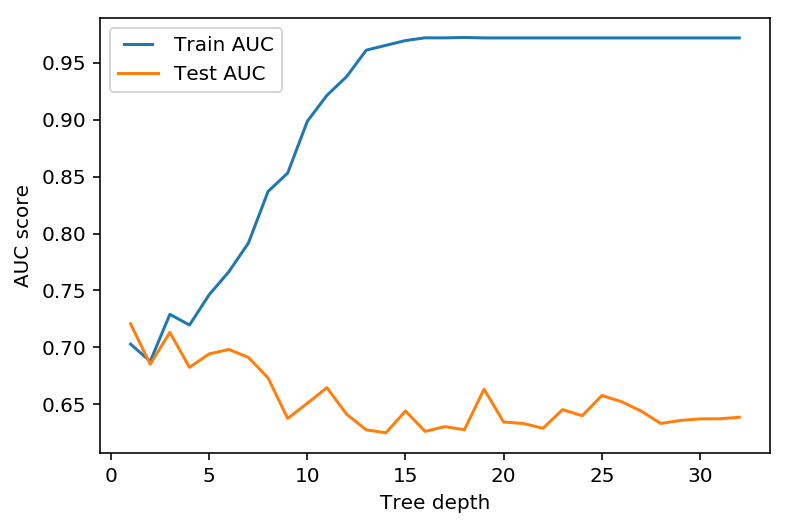

In [15]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, label='Train AUC')
line2, = plt.plot(max_depths, test_results, label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

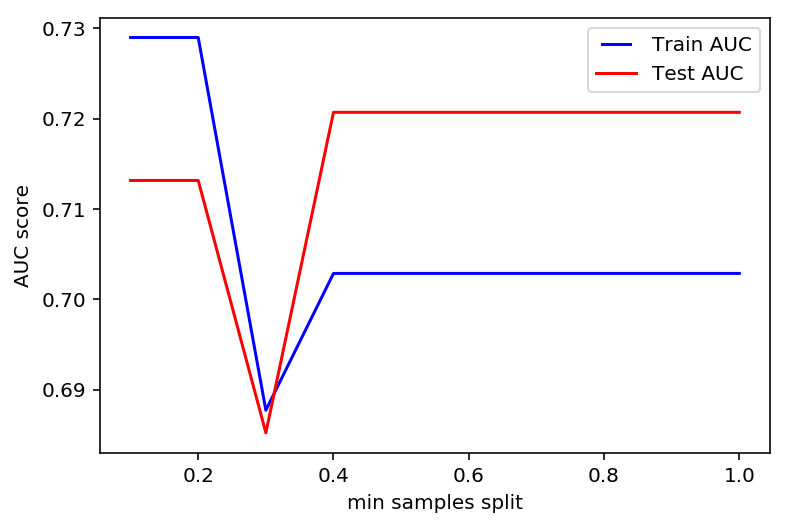

In [16]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

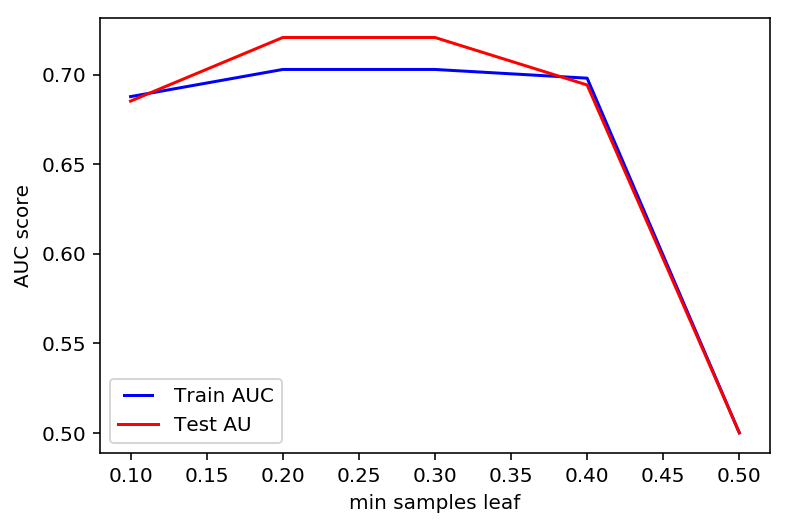

In [17]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AU')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [18]:
decision_tree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
 max_features=None, max_leaf_nodes=3,
 min_impurity_split=1e-07, min_samples_leaf=0.4,
 min_samples_split=0.2, min_weight_fraction_leaf=0.0,
 presort=False, random_state=None, splitter='best')
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
y_pred_train= decision_tree.predict(x_train)
acc_log_train = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_log_test = round(decision_tree.score(x_test, y_test) * 100, 2)
print("training accuracy: ", acc_log_train)
print("testing accuracy: ", acc_log_test)
print("")

print("Training Matrices: ")
print("")
print(metrics.classification_report(y_train, y_pred_train))
print(metrics.confusion_matrix(y_train, y_pred_train))

print("")
print("")

print("Testing Matrices: ")
print("")
print(metrics.classification_report(y_test, Y_pred))
print(metrics.confusion_matrix(y_test, Y_pred))

training accuracy:  70.76
testing accuracy:  70.96

Training Matrices: 

             precision    recall  f1-score   support

          0       0.83      0.72      0.77      1481
          1       0.53      0.67      0.59       691

avg / total       0.73      0.71      0.72      2172

[[1073  408]
 [ 227  464]]


Testing Matrices: 

             precision    recall  f1-score   support

          0       0.80      0.74      0.77       360
          1       0.56      0.65      0.60       184

avg / total       0.72      0.71      0.71       544

[[267  93]
 [ 65 119]]
